<a href="https://colab.research.google.com/github/Luluuupaz/Proyecto_final_coder/blob/main/Entrega_final_Lucia_Paz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset y Fuente de Datos:
El dataset utilizado en este proyecto proviene de Kaggle https://www.kaggle.com/code/amanpatyal/exploratory-analysis-bankchurners-csv. Se trata de un conjunto de datos recopilado por AMAN PATYAL , que contiene información sobre clientes de una institución financiera, incluyendo detalles demográficos, historial de transacciones, comportamiento de los clientes, entre otros. El dataset está compuesto por 1027 filas y 23 columnas.

Objetivo del Proyecto:
El objetivo principal de este proyecto es predecir la posible baja de clientes en el futuro. Para lograr este objetivo, se explorarán diferentes técnicas de análisis de datos y aprendizaje automático de clasificación

Hipotesis:

 Se plantea la hipótesis de que ciertas características de los clientes, como la edad, el nivel de ingresos, el historial de transacciones, entre otros, pueden ser indicadores de su propensión a abandonar el servicio.

Contexto Comercial:
La retención de clientes es fundamental para mantener la estabilidad y el crecimiento del negocio, ya que adquirir nuevos clientes suele ser más costoso que retener a los existentes.Por lo tanto, este proyecto busca proporcionar insights valiosos que ayuden a la institución financiera a tomar medidas proactivas para retener a sus clientes y mejorar su experiencia. Esto no solo puede ayudar a maximizar los ingresos y reducir los costos asociados con la adquisición de nuevos clientes, sino que también puede contribuir a la satisfacción y fidelidad de los clientes, fortaleciendo así la posición competitiva de la institución financiera en el mercado.

In [ ]:
# En este script vamos a declarar todas las funciones que vamos a utilizar en la unidad donde desarrollamos los modelos analiticos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
#Subir el archivo CSV
from google.colab import files
uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [118]:
df = pd.read_csv("BankChurners.csv")

In [119]:
#mostrar las primeras 5 columnas por defecto
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [120]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [121]:

df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# Normalización

 Normalizamos la base de datos. Determinamos si tiene nulos, espacios en blanco que queramos eliminar:

In [122]:
df.isnull().sum()/df.shape[0]

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

localizamos los valores NaN

In [123]:
#Valores NA
df.isna().sum()


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Normalizamos la base de datos. Determinamos si tiene nulos, espacios en blanco que queramos eliminar:

In [124]:
df.isnull().sum()/df.shape[0]
#Valores null


CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [125]:
df = df.dropna(axis=1, how='all')
#elimino columnas vacias


In [126]:


df.head(1000)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,717127083,Existing Customer,37,M,3,Graduate,Married,$120K +,Blue,25,...,15017.0,1733,13284.0,0.635,2076,58,0.487,0.115,0.000069,0.99993
996,772460508,Existing Customer,53,M,1,Uneducated,Married,$40K - $60K,Blue,43,...,4426.0,1530,2896.0,0.518,1231,34,0.214,0.346,0.000053,0.99995
997,720484908,Existing Customer,65,F,1,Post-Graduate,Married,$40K - $60K,Blue,52,...,2155.0,0,2155.0,1.423,1655,27,1.250,0.000,0.000334,0.99967
998,771237933,Existing Customer,47,M,1,Uneducated,Unknown,$80K - $120K,Blue,34,...,20620.0,1085,19535.0,1.276,1477,23,0.533,0.053,0.000089,0.99991


# **GRAFICOS**

In [127]:
import matplotlib.pyplot as plt


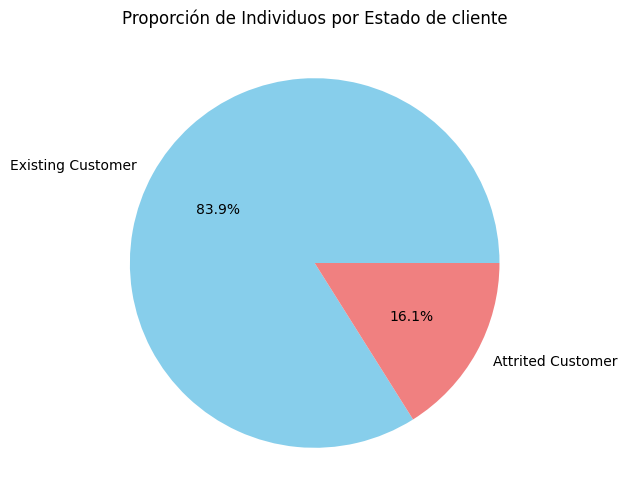

In [128]:

# Contar la cantidad de individuos en cada categoría de desgaste
estado_desgaste = df['Attrition_Flag'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 6))
plt.pie(estado_desgaste, labels=estado_desgaste.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Individuos por Estado de cliente')
plt.show()


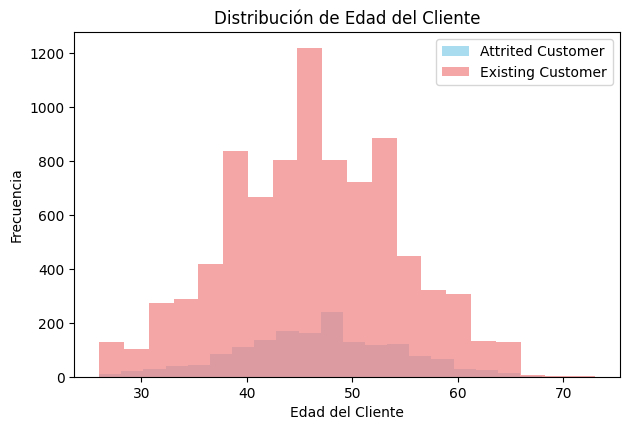

In [131]:


# Filtrar los datos para clientes que han abandonado y clientes existentes
abandonados = df[df['Attrition_Flag'] == 'Attrited Customer']
existentes = df[df['Attrition_Flag'] == 'Existing Customer']

# Crear histogramas para comparar distribuciones
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(abandonados['Customer_Age'], bins=20, color='skyblue', alpha=0.7, label='Attrited Customer')
plt.hist(existentes['Customer_Age'], bins=20, color='lightcoral', alpha=0.7, label='Existing Customer')
plt.title('Distribución de Edad del Cliente')
plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()




Para el histograma, hemos observado que el grupo de edad más propenso a churnear se encuentra en el rango de 40 a 50 años.


<Figure size 1200x600 with 0 Axes>

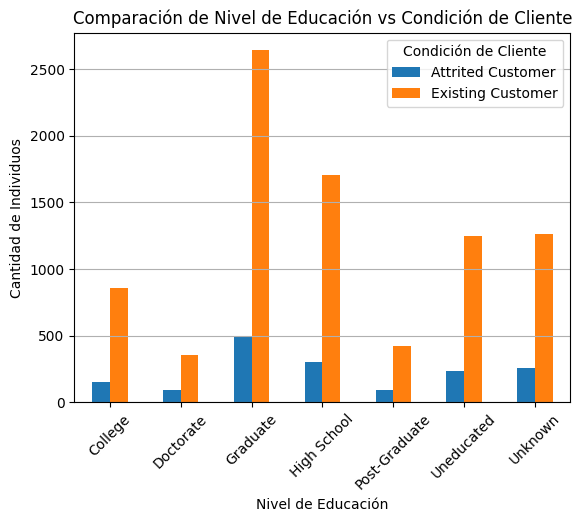

In [132]:


# Crear un DataFrame agrupado por nivel de educación y condición de cliente
grupo_educacion_cliente = df.groupby(['Education_Level', 'Attrition_Flag']).size().unstack()

# Crear el gráfico de barras agrupado
plt.figure(figsize=(12, 6))
grupo_educacion_cliente.plot(kind='bar', stacked=False)
plt.title('Comparación de Nivel de Educación vs Condición de Cliente')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Individuos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='Condición de Cliente')  # Mostrar leyenda con las condiciones de cliente
plt.grid(axis='y')  # Agregar una cuadrícula horizontal para facilitar la lectura
plt.show()


In [133]:
# Calcular el total de clientes por nivel de educación
total_por_educacion = grupo_educacion_cliente.sum(axis=1)

# Calcular el porcentaje de retención
porcentaje_retencion = grupo_educacion_cliente['Existing Customer'] / total_por_educacion * 100

# Agregar el porcentaje de retención a la tabla comparativa
grupo_educacion_cliente['Porcentaje Retención'] = porcentaje_retencion

# Mostrar la tabla comparativa con el porcentaje de retención
print(grupo_educacion_cliente)



Attrition_Flag   Attrited Customer  Existing Customer  Porcentaje Retención
Education_Level                                                            
College                        154                859             84.797631
Doctorate                       95                356             78.935698
Graduate                       487               2641             84.430946
High School                    306               1707             84.798808
Post-Graduate                   92                424             82.170543
Uneducated                     237               1250             84.061870
Unknown                        256               1263             83.146807


En general, el porcentaje de retención es bastante alto para todos los niveles de educación, con valores que oscilan entre aproximadamente 78.9% y 84.8%. Esto indica que la mayoría de los clientes, independientemente de su nivel educativo, tienden a permanecer con el banco.
Aunque el porcentaje de retención es alto en todos los niveles de educación, podemos observar que hay diferencias en la cantidad absoluta de clientes que se van (Attrited Customer) y los que permanecen (Existing Customer) entre los diferentes niveles de educación. Por ejemplo, el número más bajo de clientes que se van se observa en el nivel de educación Doctorate (95), mientras que el número más alto se observa en el nivel de educación Graduate (487).

No parece haber un patrón claro de retención en función del nivel de educación. Aunque algunos niveles de educación pueden tener ligeramente más clientes que permanecen que otros, las diferencias no son significativas.

<Figure size 1200x600 with 0 Axes>

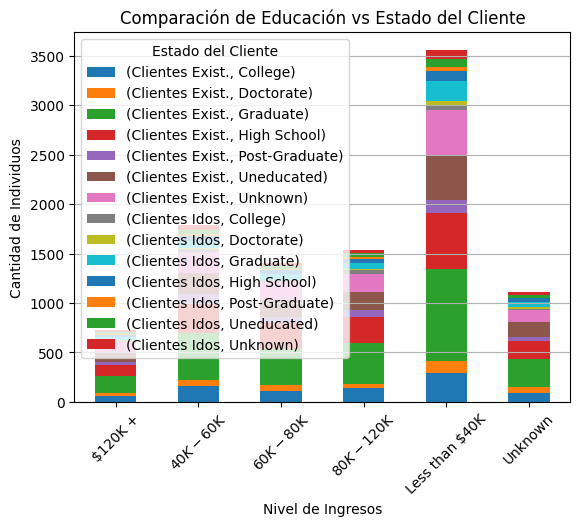

In [134]:
# Crear un DataFrame agrupado por nivel de ingresos y educación para clientes existentes
clientes_exist = df[df['Attrition_Flag'] == 'Existing Customer'].groupby(['Income_Category', 'Education_Level']).size().unstack()

# Crear un DataFrame agrupado por nivel de ingresos y educación para clientes que se han ido
clientes_idos = df[df['Attrition_Flag'] == 'Attrited Customer'].groupby(['Income_Category', 'Education_Level']).size().unstack()

# Combinar los DataFrames para comparar clientes existentes y clientes que se han ido
comparacion = pd.concat([clientes_exist, clientes_idos], axis=1, keys=['Clientes Exist.', 'Clientes Idos'])

# Llenar los valores NaN con 0 para indicar que no hay clientes en ese grupo
comparacion = comparacion.fillna(0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12,6))
comparacion.plot(kind='bar', stacked=True)
plt.title('Comparación de Educación vs Estado del Cliente')
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Cantidad de Individuos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='Estado del Cliente')  # Mostrar leyenda con los estados del cliente
plt.grid(axis='y')  # Agregar una cuadrícula horizontal para facilitar la lectura
plt.show()



Parece haber una tendencia en la que los clientes con niveles de ingresos más altos tienden a tener una mayor retención en comparación con los clientes con ingresos más bajos. Además, en algunas categorías de ingresos, como "Less than $40K", la proporción de clientes que se han ido es notablemente mayor en comparación con otras categorías de ingresos.

También podemos observar diferencias en la retención de clientes según el nivel de educación. Por ejemplo, los clientes con educación "Graduate" tienden a tener una retención más alta en comparación con los clientes con educación "High School" o "Uneducated".

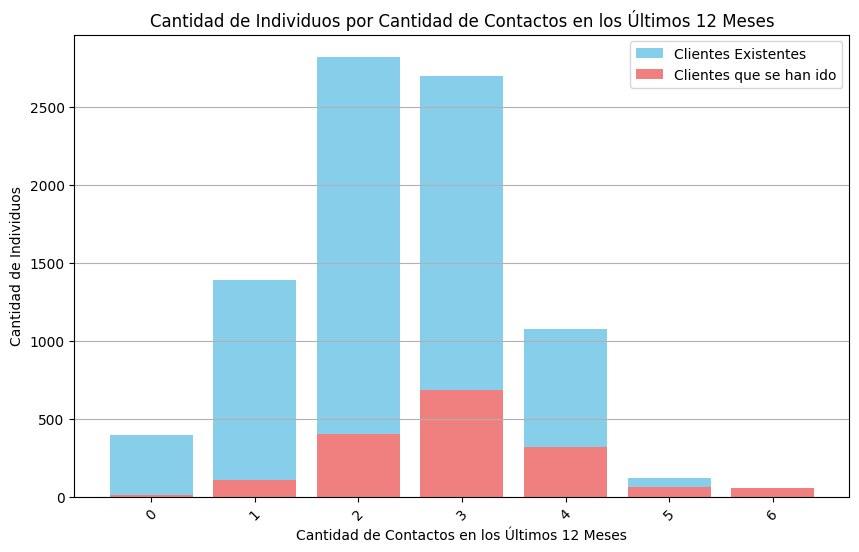

In [135]:
# Agrupar los datos por la cantidad de contactos y contar la cantidad de individuos en cada grupo para clientes existentes
contactos_exist = df[df['Attrition_Flag'] == 'Existing Customer']['Contacts_Count_12_mon'].value_counts()

# Agrupar los datos por la cantidad de contactos y contar la cantidad de individuos en cada grupo para clientes que se han ido
contactos_idos = df[df['Attrition_Flag'] == 'Attrited Customer']['Contacts_Count_12_mon'].value_counts()

# Ordenar los datos por la cantidad de contactos (opcional)
contactos_exist = contactos_exist.sort_index()
contactos_idos = contactos_idos.sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contactos_exist.index, contactos_exist.values, color='skyblue', label='Clientes Existentes')
plt.bar(contactos_idos.index, contactos_idos.values, color='lightcoral', label='Clientes que se han ido')
plt.title('Cantidad de Individuos por Cantidad de Contactos en los Últimos 12 Meses')
plt.xlabel('Cantidad de Contactos en los Últimos 12 Meses')
plt.ylabel('Cantidad de Individuos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend()  # Mostrar leyenda
plt.grid(axis='y')  # Agregar una cuadrícula horizontal para facilitar la lectura
plt.show()


La mayoría de los clientes existentes tienen una cantidad de contactos concentrada en los primeros niveles (0, 1, 2, 3), con una disminución gradual en la cantidad de clientes a medida que aumenta el número de contactos.

Por otro lado, los clientes que se han ido muestran una distribución más uniforme, con una cantidad significativa de clientes en todos los niveles de contactos, incluidos los niveles más altos. Esto sugiere que no hay una relación clara entre la cantidad de contactos y la retención de clientes, ya que algunos clientes que se han ido fueron contactados múltiples veces.

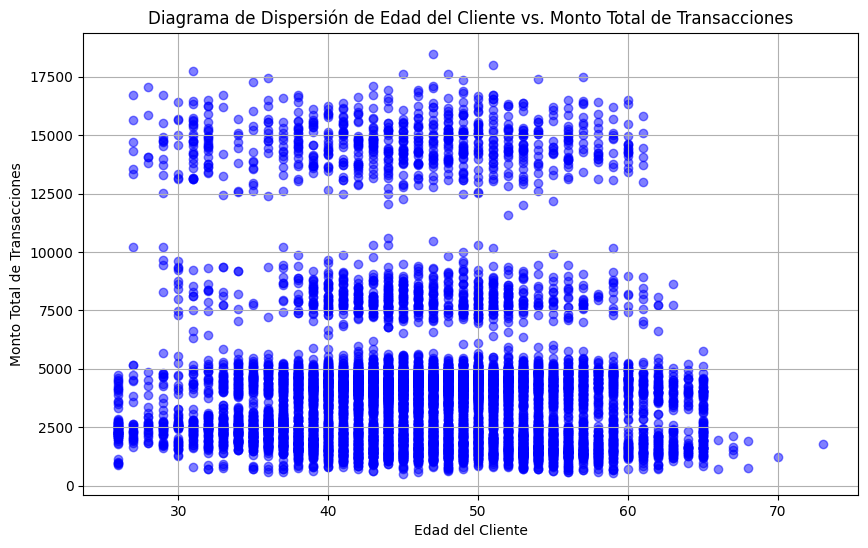

In [136]:


# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Customer_Age'], df['Total_Trans_Amt'], color='blue', alpha=0.5)
plt.title('Diagrama de Dispersión de Edad del Cliente vs. Monto Total de Transacciones')
plt.xlabel('Edad del Cliente')
plt.ylabel('Monto Total de Transacciones')
plt.grid(True)  # Agregar una cuadrícula para facilitar la lectura
plt.show()


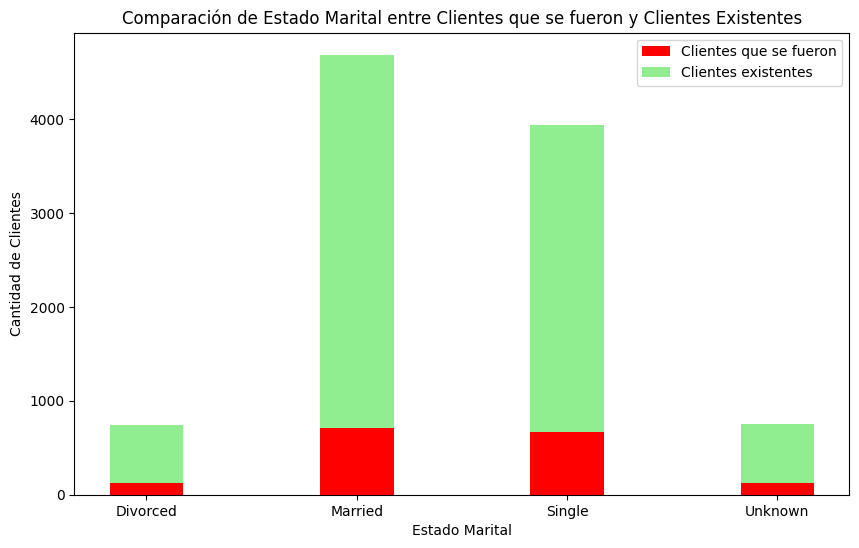

In [137]:

# Filtrar los datos para clientes que se fueron y clientes existentes
clientes_idos = df[df['Attrition_Flag'] == 'Attrited Customer']
clientes_existentes = df[df['Attrition_Flag'] == 'Existing Customer']

# Contar el número de clientes que se fueron y existentes en cada estado marital
idos_por_estado_marital = clientes_idos['Marital_Status'].value_counts()
existentes_por_estado_marital = clientes_existentes['Marital_Status'].value_counts()

# Ordenar los datos por estado marital (opcional)
idos_por_estado_marital = idos_por_estado_marital.sort_index()
existentes_por_estado_marital = existentes_por_estado_marital.sort_index()

# Crear el gráfico de barras comparativo
plt.figure(figsize=(10, 6))
width = 0.35  # Ancho de las barras

# Coordenadas para las barras
x = range(len(idos_por_estado_marital))

# Dibujar las barras
plt.bar(x, idos_por_estado_marital, width, label='Clientes que se fueron', color='red')
plt.bar(x, existentes_por_estado_marital, width, label='Clientes existentes', color='lightgreen', bottom=idos_por_estado_marital)

# Etiquetas y título
plt.xlabel('Estado Marital')
plt.ylabel('Cantidad de Clientes')
plt.title('Comparación de Estado Marital entre Clientes que se fueron y Clientes Existentes')
plt.xticks(x, idos_por_estado_marital.index)  # Etiquetas en el eje x
plt.legend()

plt.show()


En general, hay más clientes existentes que se clasifican como casados o solteros en comparación con aquellos que se fueron. Sin embargo, la proporción de clientes que se fueron y que están solteros es más alta en comparación con los clientes existentes. Esto podría indicar que los clientes solteros tienen una mayor tendencia a abandonar en comparación con los clientes casados. También es notable que hay una proporción significativa de clientes con estado marital desconocido entre los que se fueron, lo que podría indicar que la falta de información sobre el estado marital puede estar relacionada con la probabilidad de que un cliente abandone.

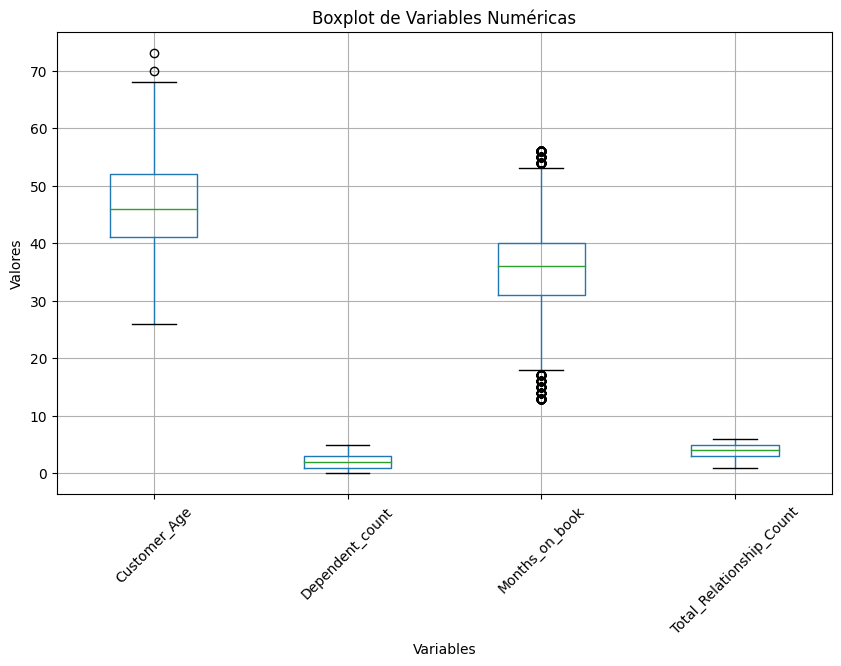

In [138]:


# Seleccionar las columnas que deseas incluir en el boxplot
columnas_boxplot = ['Attrition_Flag','Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count']

# Crear el boxplot
plt.figure(figsize=(10, 6))
df[columnas_boxplot].boxplot()
plt.title('Boxplot de Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(True)  # Agregar una cuadrícula para facilitar la lectura
plt.show()


In [139]:
# Mapear los valores de Attrition_Flag a valores numéricos
mapping = {'Existing Customer': 1, 'Attrited Customer': 0}

# Usar la función replace para asignar los valores numéricos
df['Attrition_Flag'] = df['Attrition_Flag'].replace(mapping)

In [141]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [142]:
columnas_boxplot = ['Attrition_Flag','Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count']

estadisticas_descriptivas = df[columnas_boxplot].describe()

print(estadisticas_descriptivas)


       Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
count    10127.000000  10127.000000     10127.000000    10127.000000   
mean         0.839340     46.325960         2.346203       35.928409   
std          0.367235      8.016814         1.298908        7.986416   
min          0.000000     26.000000         0.000000       13.000000   
25%          1.000000     41.000000         1.000000       31.000000   
50%          1.000000     46.000000         2.000000       36.000000   
75%          1.000000     52.000000         3.000000       40.000000   
max          1.000000     73.000000         5.000000       56.000000   

       Total_Relationship_Count  
count              10127.000000  
mean                   3.812580  
std                    1.554408  
min                    1.000000  
25%                    3.000000  
50%                    4.000000  
75%                    5.000000  
max                    6.000000  


Customer_Age: La edad media de los clientes es de aproximadamente 46 años, con una desviación estándar de alrededor de 8 años. La mayoría de los clientes tienen entre 41 y 52 años, ya que el 50% de los datos se encuentran en este rango, con una dispersión desde los 26 hasta los 73 años.

Dependent_count: En promedio, los clientes tienen alrededor de 2 dependientes, con una desviación estándar de aproximadamente 1.3. La mayoría de los clientes tienen entre 1 y 3 dependientes, según el percentil 25% y 75%.

Months_on_book: Los clientes tienen una media de aproximadamente 36 meses en el libro del banco, con una dispersión de aproximadamente 8 meses alrededor de la media. La mayoría de los clientes tienen entre 31 y 40 meses en el libro, como se refleja en el rango intercuartil.

Total_Relationship_Count: En promedio, los clientes tienen alrededor de 4 relaciones con el banco, con una desviación estándar de aproximadamente 1.55. La mayoría de los clientes tienen entre 3 y 5 relaciones con el banco, según los percentiles 25% y 75%.

In [143]:

# Seleccionar solo las columnas requeridas
df_columnas_seleccionadas = df[['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count']]

# Verificar las columnas seleccionadas
print(df_columnas_seleccionadas.columns)


Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count'],
      dtype='object')


In [144]:
df_columnas_seleccionadas.corr()


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.013687,0.150005
Customer_Age,-0.018203,1.000000,-0.122254,0.788912,-0.010931
Dependent_count,-0.018991,-0.122254,1.000000,-0.103062,-0.039076
Months_on_book,-0.013687,0.788912,-0.103062,1.000000,-0.009203
Total_Relationship_Count,0.150005,-0.010931,-0.039076,-0.009203,1.000000


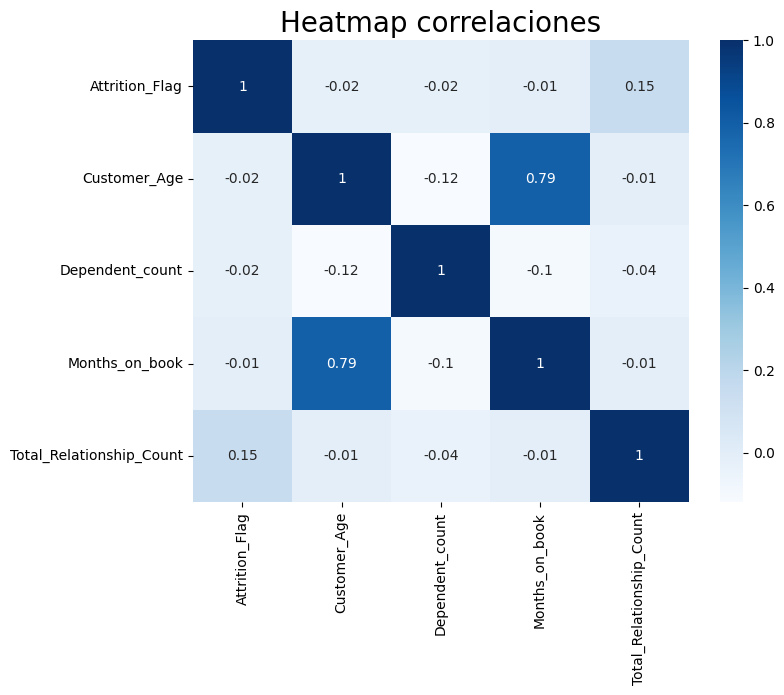

In [145]:
plt.figure(figsize=(8, 6))
sns.heatmap(round(df_columnas_seleccionadas.corr(),2), annot=True, cmap = 'Blues')
plt.title('Heatmap correlaciones', fontsize = 20)
plt.show()

CONCLUSIÓN

Correlación positiva entre Customer_Age y Months_on_book: El coeficiente de correlación es de 0.788912, lo que indica una correlación positiva fuerte entre la edad del cliente y la cantidad de meses que lleva en el libro (probablemente la duración de la relación con el banco).

Correlación negativa leve entre Customer_Age y Dependent_count: El coeficiente de correlación es -0.122254, lo que indica una correlación negativa leve entre la edad del cliente y la cantidad de dependientes. Esto sugiere que, en promedio, clientes más jóvenes tienden a tener más dependientes.

Correlación negativa muy débil entre Customer_Age y Total_Relationship_Count: El coeficiente de correlación es -0.010931, lo que indica una correlación negativa muy débil entre la edad del cliente y la cantidad total de relaciones que tiene con el banco.

Correlación negativa leve entre Dependent_count y Total_Relationship_Count: El coeficiente de correlación es -0.039076, lo que indica una correlación negativa leve entre la cantidad de dependientes y la cantidad total de relaciones que tiene el cliente con el banco.

In [146]:
import numpy as np


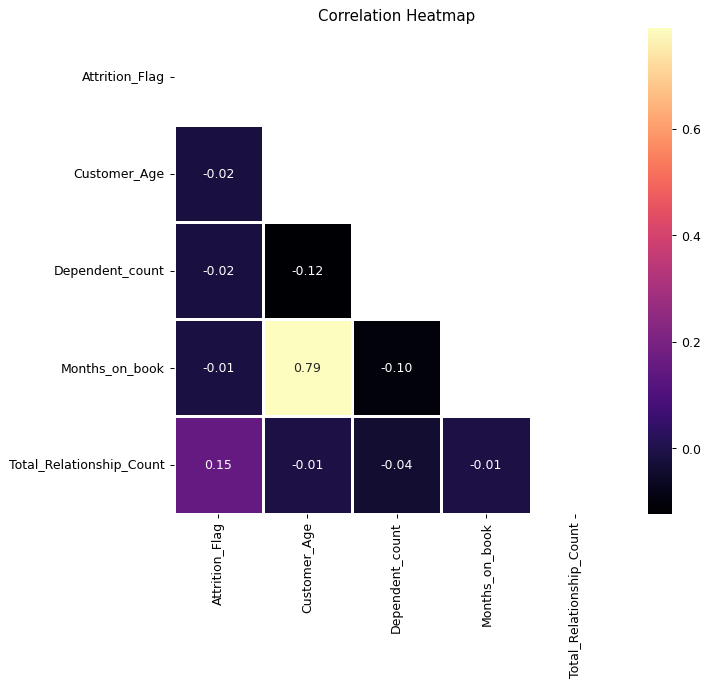

In [147]:
plt.figure(dpi = 90,figsize= (8,7))
mask = np.triu(np.ones_like(df_columnas_seleccionadas.corr(),dtype = bool))
sns.heatmap(df_columnas_seleccionadas.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'magma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

MACHINE LEARNING: MODELO CLASIFICACIÓN

In [148]:
df_columnas_seleccionadas.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580
std,0.367235,8.016814,1.298908,7.986416,1.554408
min,0.000000,26.000000,0.000000,13.000000,1.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000
50%,1.000000,46.000000,2.000000,36.000000,4.000000
75%,1.000000,52.000000,3.000000,40.000000,5.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000


In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [155]:
# Especificar características
features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count']


In [156]:
# Separar características (features) y etiquetas (labels)
X = df[features]  # Características
y = df["Attrition_Flag"]  # Etiquetas


In [157]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.7882527147087858

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.20      0.10      0.13       327
           1       0.84      0.92      0.88      1699

    accuracy                           0.79      2026
   macro avg       0.52      0.51      0.51      2026
weighted avg       0.74      0.79      0.76      2026




En general, el modelo tiene un rendimiento bastante bueno para la clase "1" (Existing Customer), con alta precisión, recall y puntaje F1. Sin embargo, el rendimiento para la clase "0" (Attrited Customer) es mucho peor, lo que sugiere que el modelo tiene dificultades para clasificar correctamente las muestras de esta clase. Esto puede deberse a un desequilibrio en los datos, donde hay muchas más muestras de la clase "1" que de la clase "0", lo que hace que el modelo tenga menos datos para aprender cómo clasificar correctamente las muestras de la clase "0".






Probando otro modelo

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Especificar características
features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count']

# Separar características (features) y etiquetas (labels)
X = df[features]  # Características
y = df["Attrition_Flag"]  # Etiquetas

# Convertir variables categóricas en variables numéricas utilizando codificación one-hot
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.8371174728529122

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.20      0.00      0.01       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.52      0.50      0.46      2026
weighted avg       0.74      0.84      0.77      2026



En resumen, el modelo tiene un buen desempeño en la clasificación de la clase mayoritaria (Existing Customer), pero tambien tiene dificultades para clasificar la clase minoritaria (Attrited Customer). Es importante considerar el desequilibrio de clases en tus datos y tomar medidas para abordarlo, como el reequilibrio de las clases o la utilización de técnicas específicas para datos desequilibrados, como la ponderación de clases o el muestreo estratificado. Además, podrías explorar ajustes en el modelo o características adicionales para mejorar su rendimiento en la clasificación de la clase minoritaria.



